In [1]:
## Imports
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# import plotly and offline mode
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go

# import cufflinks and offline mode
import cufflinks as cf
cf.go_offline()

% matplotlib inline

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [2]:
##Loading data

In [3]:
telecom_data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
display(telecom_data.head(5))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telecom_data.shape

(7043, 21)

In [5]:
del telecom_data["customerID"] # Deleting the custumerID column as it is not going to help in regression

In [6]:
telecom_data.head().T #Transposed for easier visualization

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


In [7]:
telecom_data['SeniorCitizen']=pd.Categorical(telecom_data['SeniorCitizen']) #Changing from int to categorical
telecom_data.dtypes

gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges          object
Churn                 object
dtype: object

 until now I have checked the size of my dataset, the first 5 rows (transposed), the type of each variable (changing the SeniorCitizen to categorical)

delete the custumerID since it doesn’t help to predict if the client is going to leave.

In [8]:
telecom_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
## Now we need to see why the dtype of Total charges is object type

In [10]:
telecom_data.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'], dtype=object)

In [11]:
telecom_data[pd.to_numeric(telecom_data['TotalCharges'], errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
telecom_data['new_tenure_col'] = telecom_data['tenure']

In [13]:
telecom_data['new_tenure_col'] = pd.Series(np.where(telecom_data.new_tenure_col.values == 0, 1, telecom_data['new_tenure_col']),telecom_data.index)

Now we consider total charges for tenure = 0 to be same as monthly charge because that is the amount user has paid because tenure  =0 represents those customers who have not completed one month but have paid the monthly charge 

In [14]:
telecom_data['TotalCharges'] = np.where(telecom_data['tenure']== 0, (telecom_data['MonthlyCharges']  * telecom_data['new_tenure_col']), telecom_data['TotalCharges'])

In [15]:
telecom_data[(telecom_data['tenure'] == 0)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,new_tenure_col
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,No,1
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25,No,1
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,No,1
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75,No,1
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05,No,1
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,19.85,No,1
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35,No,1
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20,No,1
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.7,No,1
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35,No,1


In [16]:
telecom_data = telecom_data.drop(['new_tenure_col'], axis=1) ## drop the column we created for calculation 

In [17]:
telecom_data[(telecom_data['tenure'] == 0)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,19.85,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.7,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35,No


In [18]:
telecom_data.TotalCharges = telecom_data.TotalCharges.astype('float')

In [19]:
telecom_data.dtypes

gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [20]:
## I will split the dataset into numeric and objects to facilitate the analysis:
numerics = ['float64', 'int64']
numeric_ds = telecom_data.select_dtypes(include=numerics)
objects_ds = telecom_data.select_dtypes(exclude=numerics)

In [21]:
numeric_ds.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.798992
std,24.559481,30.090047,2266.730170
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [22]:
objects_ds.describe().T

,count,unique,top,freq
gender,7043,2,Male,3555
SeniorCitizen,7043,2,0,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [23]:
telecom_data.groupby('Churn').size()

Churn
No     5174
Yes    1869
dtype: int64

# Graphical Analysis

### Numerical

[]

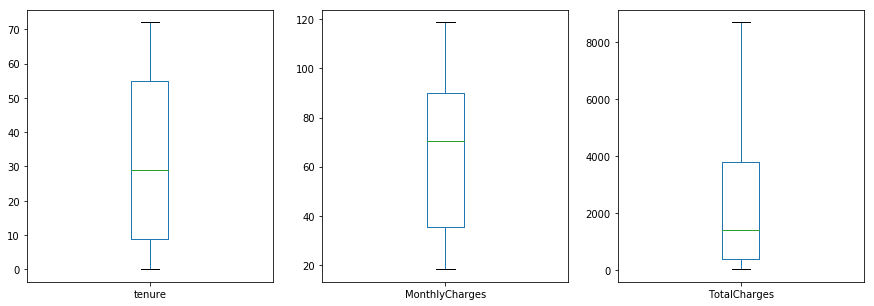

In [24]:
# box plots
numeric_ds.plot(kind='box',subplots=True, figsize=(15,5))
plt.plot()


[]

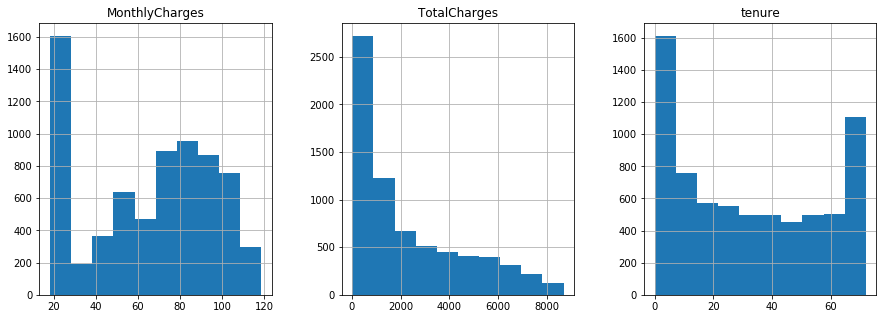

In [25]:
# histogram plots
numeric_ds.hist(layout=(1,3), figsize=(15,5))
plt.plot()

The box plot and histogram shows us that our numerical variables are not normally distributed, I will check how they relate to the variable we are trying to predict and aggregate those variable in bins.

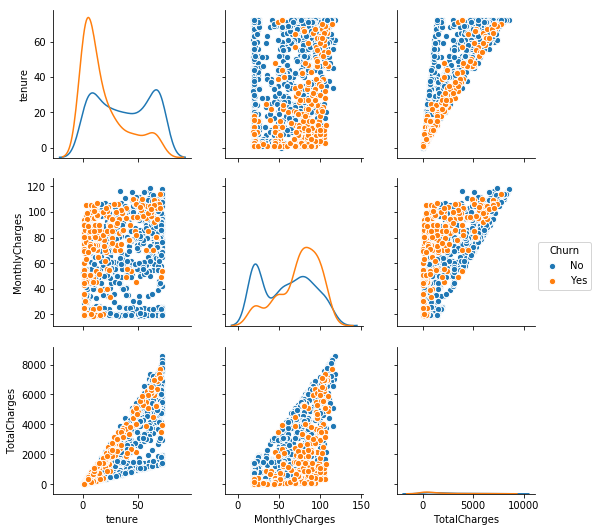

In [26]:
numeric_ds = pd.concat([numeric_ds,telecom_data["Churn"]],axis=1) #Add the 'Churn' variable to the numeric dataset

g = sns.PairGrid(numeric_ds.sample(n=1000), hue="Churn")
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()

Both the ‘tenure’ and the ‘MonthlyCharges’ are looking like good predictors of the ‘Churn’ variable, I will use the violin plot now to decide the bins that I’m going to use.

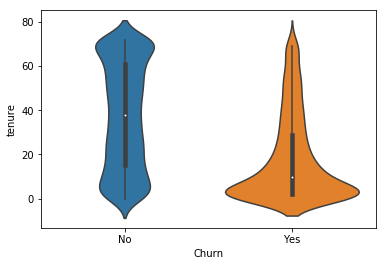

In [27]:
sns.violinplot(x="Churn", y="tenure", data=numeric_ds);

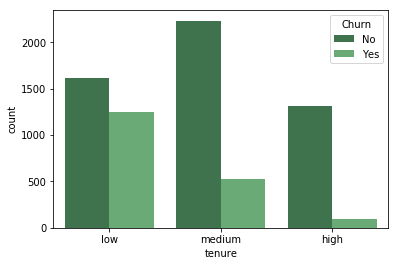

In [28]:
tenure_bins=pd.cut(numeric_ds["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])
sns.countplot(x=tenure_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

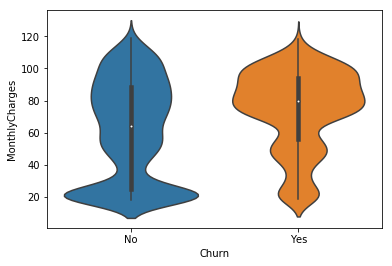

In [29]:
sns.violinplot(x="Churn", y="MonthlyCharges", data=numeric_ds);

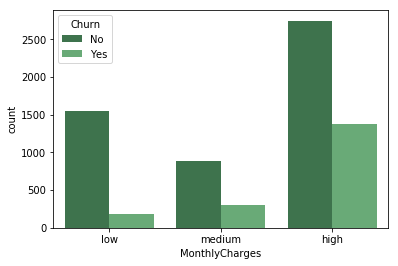

In [30]:
MonthlyCharges_bins=pd.cut(numeric_ds["MonthlyCharges"], bins=[0,35,60,130], labels=['low','medium','high'])
sns.countplot(x=MonthlyCharges_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

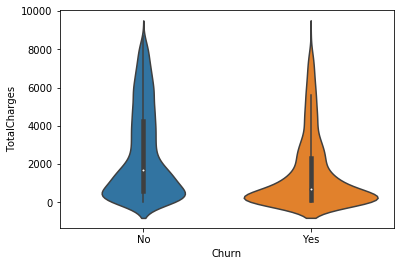

In [31]:
sns.violinplot(x="Churn", y="TotalCharges", data=numeric_ds);

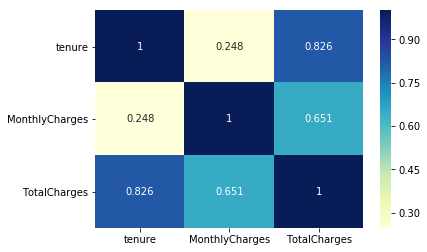

In [32]:
sns.heatmap(numeric_ds.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

#### We can see that total charges is highly correlated with monthly charges and tenure hence we can drop it from our analysis

I divided the two significant  numerical variables in 3 bins according to the violin plot trying to separate then in a way to distinguish the low churn rate areas from the high churn rate areas and you can see from the count plots how the distribution is different in each bin, I will save then into another data frame now.



Next step is to analyse the numerical variables compared to the categorical variables.

In [33]:
bins=pd.DataFrame([tenure_bins, MonthlyCharges_bins]).T

## Numeric vs Categorical Plots

I will use the PairGrid from the Seaborn library for that, since there was too many variables to plot I will split in 3:

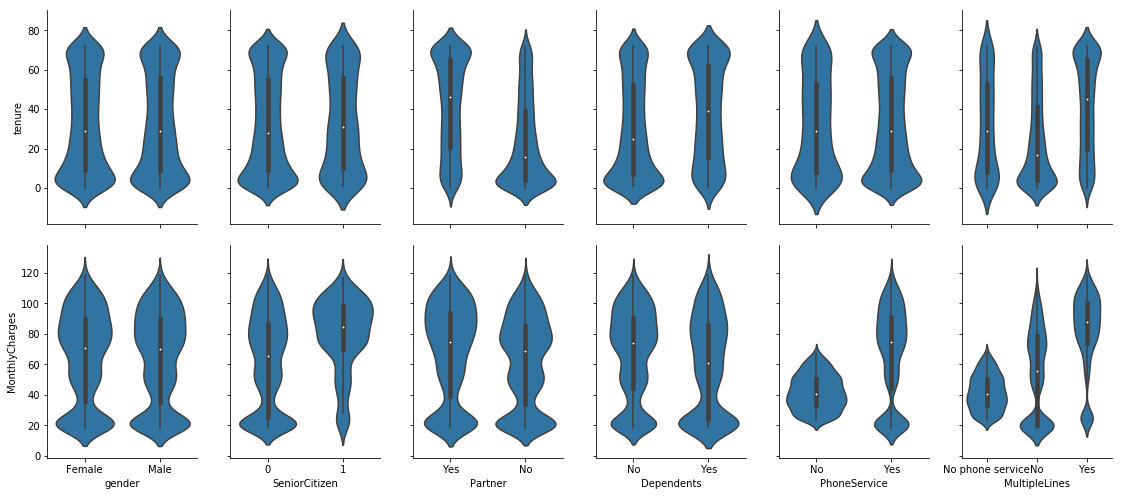

In [34]:
g = sns.PairGrid(telecom_data, x_vars=objects_ds.columns[0:6].values,
    y_vars=numeric_ds.columns[0:2].values, aspect=.75, size=3.5)
g.map(sns.violinplot);

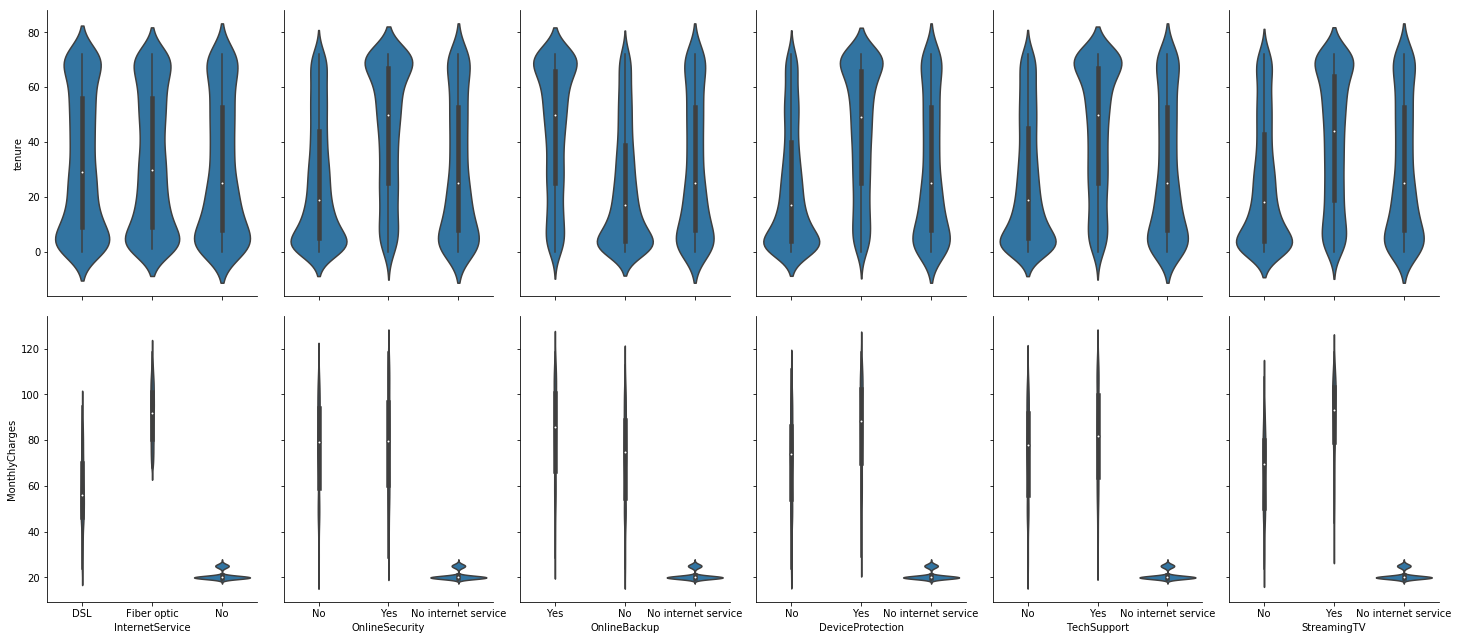

In [35]:
g = sns.PairGrid(telecom_data, x_vars=objects_ds.columns[6:12].values,  
    y_vars=numeric_ds.columns[0:2].values, aspect=.75, size=4.5)
g.map(sns.violinplot);

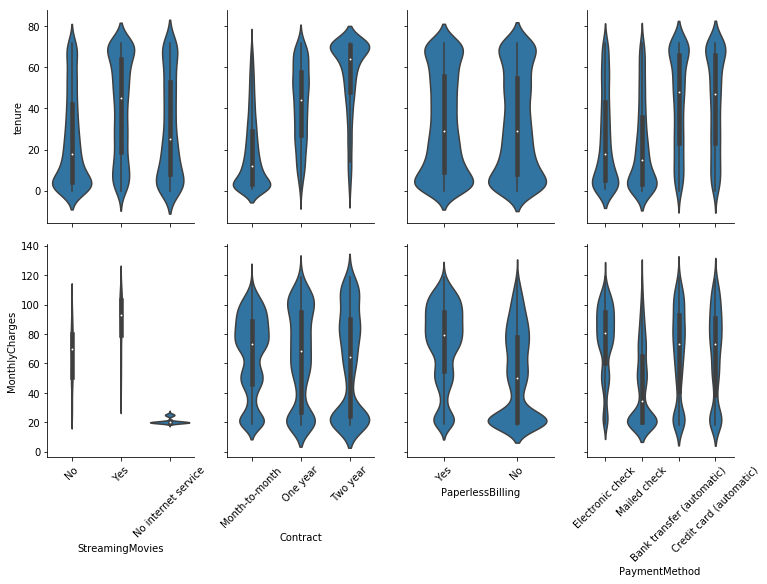

In [36]:
g = sns.PairGrid(telecom_data, x_vars=objects_ds.columns[12:16].values,
    y_vars=numeric_ds.columns[0:2].values, aspect=.75, size=3.5)
for ax in g.axes.flat:
   for tick in ax.get_xticklabels():
      tick.set_rotation(45)
g.map(sns.violinplot);

Those plots shows us how each of the categorical variables relates to the numerical variables, for example the clients which the Payment method is electronic or mailed check have a lower tenure and we can also see the variables that does not influence the tenure or Monthly Payment like the gender, this is important for when we design the retention campaigns so we know where we can focus, but we still don’t know the variables that influences the most so we can focus on the variables that will give us the best return and we also would like to know the clients with the highest chance of leaving.

Let’s focus now on the categorical variables:

### Categorical Plots

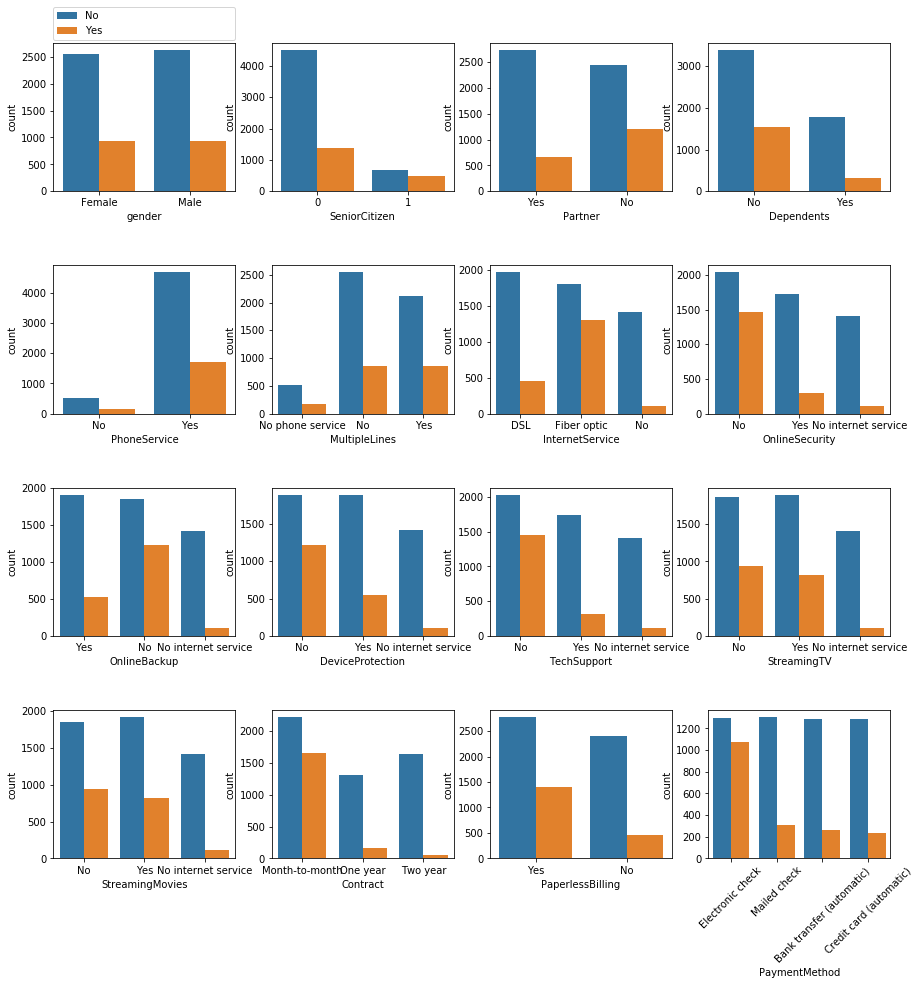

In [37]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objects_ds.iloc[:,i], hue=objects_ds["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

Now we have a better picture of the variables that are more important to us, for example, having Month-to-month contract is a strong indicator if the client might leave soon, so is the Electronic check payment method, being a senior citizen on the other hand is a good predictor but only represents a small amount of the companies clients so you might prefer to focus on the variables that delivers the best results first before tackling it.

### Logistic Regression

In [38]:
data=pd.concat([bins,objects_ds],axis=1)  # Concatenate bins with object variables
for i in list(data.columns):
    data[i] = pd.Categorical(data[i]) # Convert all the variables into categorical
log_data = pd.get_dummies(data,drop_first=True) # Transform the categorical variables into binary vectors

In [39]:
log_data.head()

,tenure_low,tenure_medium,MonthlyCharges_low,MonthlyCharges_medium,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,0,1,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,0,1,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


In [40]:
list(log_data)

['tenure_low',
 'tenure_medium',
 'MonthlyCharges_low',
 'MonthlyCharges_medium',
 'gender_Male',
 'SeniorCitizen_1',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'Churn_Yes']

'MultipleLines_No phone service' only gives infomration about whether there is phone service or not which is already captured in phone service column so we should drop this column

same is the case for 'OnlineSecurity_No internet service',OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service', 'StreamingTV_No internet service','StreamingMovies_No internet service'

In [41]:
log_data.drop([
'MultipleLines_No phone service', 'OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service', 'StreamingTV_No internet service','StreamingMovies_No internet service'], axis=1, inplace=True)

Now creating the model

In [42]:
features = log_data.drop(["Churn_Yes"], axis=1).columns
X = log_data[features].values
Y = log_data["Churn_Yes"].values


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      0.91      0.87      1697
          1       0.68      0.55      0.61       628

avg / total       0.80      0.81      0.80      2325



This table shows that our model have a good overall prediction 80% with 81% overall recall suggest that our model is not missing much of churn prediction in the whole test sample, 

Interpretation: 

The model has a higher precision in classifying unsuccessful churn ("0",85%). In particular the 91% recall suggests that it almost does not miss out any of the unsuccessful churn in the whole test sample.

To identify successful churn cases ("1"). It  captures about 68% of the potential candidates. The proportion of true positive classifications that are true positive is (55%).



### Importance of each variable 

In [45]:
coefs = np.std(X_train, 0)*logmodel.coef_
df_imp = pd.DataFrame(coefs).T
df_imp.columns=["importance"]
df_imp["labels"] = features
df_imp.sort_values("importance", inplace=True, ascending=False)
display(df_imp.head(5))
display(df_imp.tail(5))

,importance,labels
0,0.654476,tenure_low
10,0.508361,InternetService_Fiber optic
1,0.202577,tenure_medium
22,0.166802,PaymentMethod_Electronic check
17,0.165113,StreamingMovies_Yes


,importance,labels
8,-0.117250,PhoneService_Yes
12,-0.192432,OnlineSecurity_Yes
11,-0.319166,InternetService_No
18,-0.331546,Contract_One year
19,-0.759671,Contract_Two year


Those tables gives us the most important features to predict if the client will leave or not, where the highest ones indicate strong chance of leaving and the lower ones indicates high chance of staying, I can plot all the variables to make it easier to see

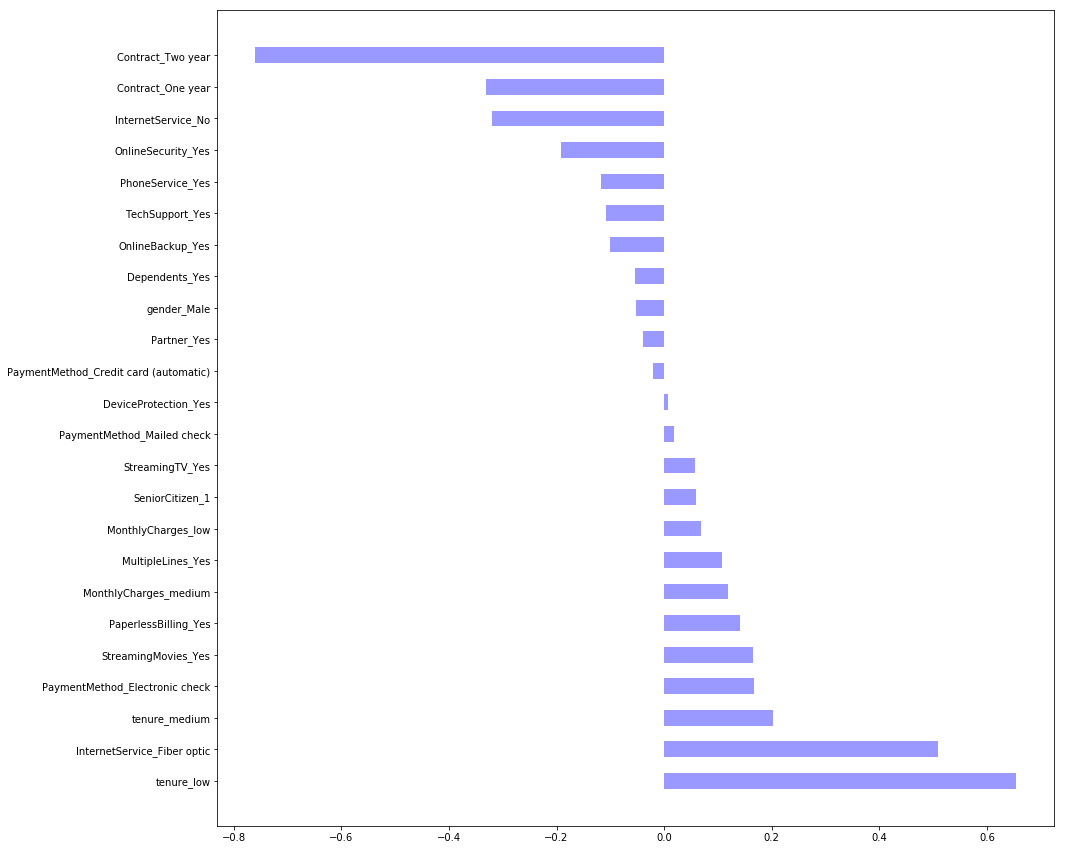

In [46]:
index = np.arange(len(df_imp))
fig = plt.figure(figsize=(15,15))
bar_width = 0.5
rects = plt.barh(index , df_imp["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_imp["labels"])
plt.show()

## Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [48]:
confusion_matrix(y_test, predictions)

array([[1536,  161],
       [ 281,  347]], dtype=int64)

The result is telling us that we have 1536 + 347 correct predictions and 281 +161 incorrect predictions.
Which shows our model is quite good

In [49]:
accuracy_score(y_test,predictions)

0.80989247311827961

### Receiver Operating Characteristic (ROC) Curves

##### The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

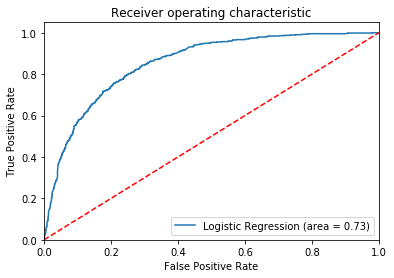

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Odds Ratio

One of the interesting performance measurements in logistic regression is Odds Ratio.Basically, Odds ratio is what the odds of an event is happening.

In [52]:
np.exp(logmodel.coef_)

array([[ 3.79195814,  1.51420108,  1.17108891,  1.3760344 ,  0.90170933,
         1.17777278,  0.92464862,  0.88745774,  0.66953812,  1.24498248,
         2.78832934,  0.4635351 ,  0.65313781,  0.81012746,  1.01677836,
         0.78755439,  1.12375295,  1.4024548 ,  0.44574548,  0.16990306,
         1.33092643,  0.94945165,  1.42277466,  1.0445312 ]])

GITHUB LINK - https://github.com/saurabhdiwan34/MyProjects